In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [3]:
data = pd.read_csv("../data/crabs.csv") 
data.head(8)

Unnamed: 0 sp sex  index    FL   RW    CL    CW    BD
0           1  B   M      1   8.1  6.7  16.1  19.0   7.0
1           2  B   M      2   8.8  7.7  18.1  20.8   7.4
2           3  B   M      3   9.2  7.8  19.0  22.4   7.7
3           4  B   M      4   9.6  7.9  20.1  23.1   8.2
4           5  B   M      5   9.8  8.0  20.3  23.0   8.2
5           6  B   M      6  10.8  9.0  23.0  26.5   9.8
6           7  B   M      7  11.1  9.9  23.8  27.1   9.8
7           8  B   M      8  11.6  9.1  24.5  28.4  10.4

In [4]:
data.describe()

Unnamed: 0       index          FL         RW          CL          CW  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean   100.500000   25.500000   15.583000   12.73850   32.105500   36.414500   
std     57.879185   14.467083    3.495325    2.57334    7.118983    7.871955   
min      1.000000    1.000000    7.200000    6.50000   14.700000   17.100000   
25%     50.750000   13.000000   12.900000   11.00000   27.275000   31.500000   
50%    100.500000   25.500000   15.550000   12.80000   32.100000   36.800000   
75%    150.250000   38.000000   18.050000   14.30000   37.225000   42.000000   
max    200.000000   50.000000   23.100000   20.20000   47.600000   54.600000   

               BD  
count  200.000000  
mean    14.030500  
std      3.424772  
min      6.100000  
25%     11.400000  
50%     13.900000  
75%     16.600000  
max     21.600000

In [6]:
# Sélection des variables quantitatives et conversion en forme verticale
x = data.iloc[:,4:9].values
x

array([[ 8.1,  6.7, 16.1, 19. ,  7. ],
       [ 8.8,  7.7, 18.1, 20.8,  7.4],
       [ 9.2,  7.8, 19. , 22.4,  7.7],
       [ 9.6,  7.9, 20.1, 23.1,  8.2],
       [ 9.8,  8. , 20.3, 23. ,  8.2],
       [10.8,  9. , 23. , 26.5,  9.8],
       [11.1,  9.9, 23.8, 27.1,  9.8],
       [11.6,  9.1, 24.5, 28.4, 10.4],
       [11.8,  9.6, 24.2, 27.8,  9.7],
       [11.8, 10.5, 25.2, 29.3, 10.3],
       [12.2, 10.8, 27.3, 31.6, 10.9],
       [12.3, 11. , 26.8, 31.5, 11.4],
       [12.6, 10. , 27.7, 31.7, 11.4],
       [12.8, 10.2, 27.2, 31.8, 10.9],
       [12.8, 10.9, 27.4, 31.5, 11. ],
       [12.9, 11. , 26.8, 30.9, 11.4],
       [13.1, 10.6, 28.2, 32.3, 11. ],
       [13.1, 10.9, 28.3, 32.4, 11.2],
       [13.3, 11.1, 27.8, 32.3, 11.3],
       [13.9, 11.1, 29.2, 33.3, 12.1],
       [14.3, 11.6, 31.3, 35.5, 12.7],
       [14.6, 11.3, 31.9, 36.4, 13.7],
       [15. , 10.9, 31.4, 36.4, 13.2],
       [15. , 11.5, 32.4, 37. , 13.4],
       [15. , 11.9, 32.5, 37.2, 13.6],
       [15.2, 12.1, 32.3,

In [7]:
# Sélection de la variable catégorielle et conversion en format vertical
y = data.iloc[:,1].values
y

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
#normalisation
x = StandardScaler().fit_transform(x)
x

array([[-2.14623182e+00, -2.35244988e+00, -2.25392649e+00,
        -2.21777180e+00, -2.05798865e+00],
       [-1.94546178e+00, -1.96287468e+00, -1.97228249e+00,
        -1.98853816e+00, -1.94089947e+00],
       [-1.83073603e+00, -1.92391716e+00, -1.84554270e+00,
        -1.78477492e+00, -1.85308259e+00],
       [-1.71601029e+00, -1.88495963e+00, -1.69063850e+00,
        -1.69562851e+00, -1.70672111e+00],
       [-1.65864742e+00, -1.84600211e+00, -1.66247410e+00,
        -1.70836371e+00, -1.70672111e+00],
       [-1.37183306e+00, -1.45642691e+00, -1.28225470e+00,
        -1.26263163e+00, -1.23836441e+00],
       [-1.28578876e+00, -1.10580922e+00, -1.16959711e+00,
        -1.18622042e+00, -1.23836441e+00],
       [-1.14238158e+00, -1.41746939e+00, -1.07102171e+00,
        -1.02066279e+00, -1.06273064e+00],
       [-1.08501871e+00, -1.22268178e+00, -1.11326831e+00,
        -1.09707400e+00, -1.26763670e+00],
       [-1.08501871e+00, -8.72064099e-01, -9.72446308e-01,
        -9.06045967e-01

In [10]:
#verifications
print("La moyenne : ",np.mean(x,axis=0))
print("L'écart type : ",np.std(x,axis=0))

La moyenne :  [-7.10542736e-17  6.03961325e-16  1.06581410e-16 -4.97379915e-16
  0.00000000e+00]
L'écart type :  [1. 1. 1. 1. 1.]


In [11]:
from sklearn.decomposition import PCA as sklearnPCA

In [12]:
pca = sklearnPCA(n_components = 2)

In [23]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [24]:
# Visualisation de la matrice dans le nouveau repére
principaldata = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldata.head(2)

Axe principal 1  Axe principal 2
0         4.927573        -0.268445
1         4.386176        -0.094074

In [26]:
# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0

finaldata = pd.concat([principaldata, data[['sp']]], axis = 1)
finaldata.head(2)

Axe principal 1  Axe principal 2 sp
0         4.927573        -0.268445  B
1         4.386176        -0.094074  B

In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

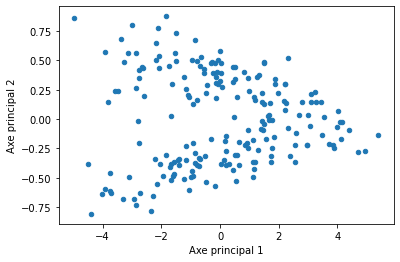

In [28]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldata.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [29]:
# Attribut pour rechercher les élements uniques d'une liste
finaldata.sp.unique()

array(['B', 'O'], dtype=object)

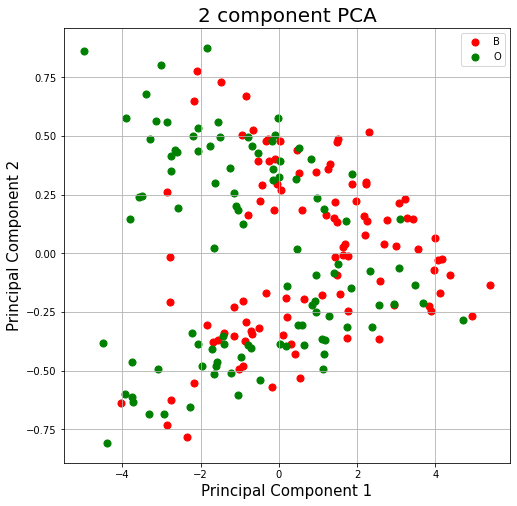

In [30]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldata['sp'] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldata.loc[indicesToKeep, 'Axe principal 1']
               , finaldata.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
# Modèle représentatif car couvert à plus de 95%
pca.explained_variance_ratio_

array([0.95776696, 0.03033704])

In [33]:
from sklearn.decomposition import PCA

In [34]:
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x)

In [35]:
#nombres de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

5


In [36]:
#valeurs propres
variance = acp.explained_variance_
print(variance)
eigval = variance*(len(x)-1)/len(x) 
print(eigval)

[4.81289928e+00 1.52447444e-01 4.68673106e-02 1.11913137e-02
 1.72027905e-03]
[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]


In [37]:
# ratio de réprésentation des valeurs propres
print(acp.explained_variance_ratio_)

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]


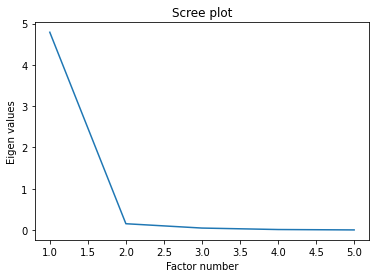

In [38]:
# scree plot : éboulis des valeurs propres
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

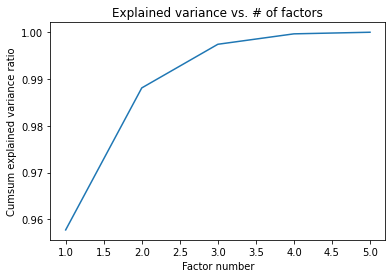

In [39]:
# cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [40]:
# test des bâtons brisés
bk = 1/np.arange(n,0,-1)
#print(bk)
bk = np.cumsum(bk)
#print(bk)
bk = bk[::-1]
#print(bk)
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

   Val.Propre    Seuils
0    4.788835  2.283333
1    0.151685  1.283333
2    0.046633  0.783333
3    0.011135  0.450000
4    0.001712  0.200000


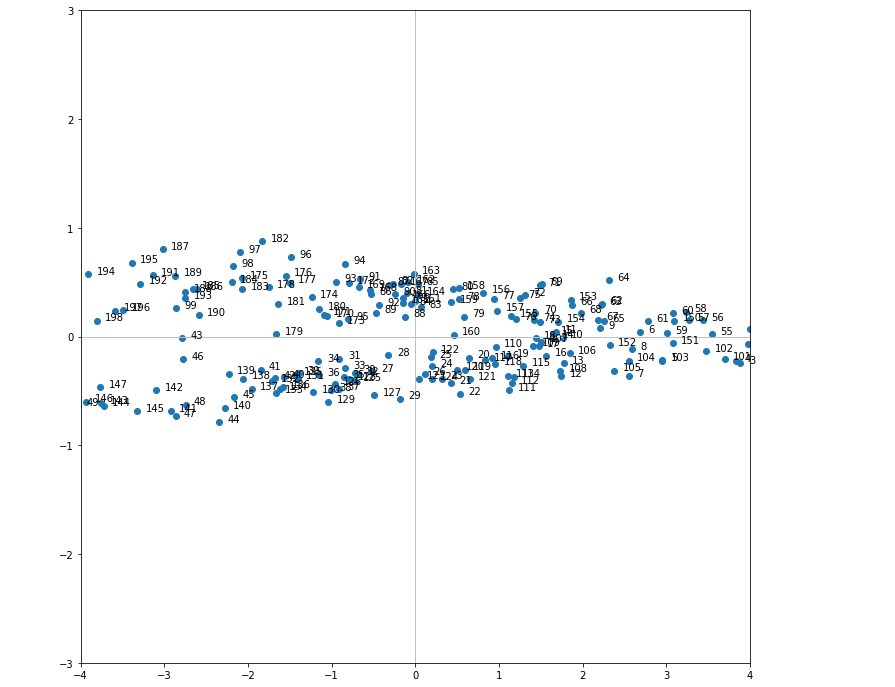

In [50]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(200):
     plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [54]:
# contribution des individus dans l'inertie totale
# les carrés des distances à l’origine des individus
di = np.sum(x**2,axis=1)
print(pd.DataFrame({'Id':data.index,'d_i':di}))

      Id        d_i
0      0  24.374345
1      1  19.248972
2      2  17.078416
3      3  15.144076
4      4  14.754059
..   ...        ...
195  195  12.046593
196  196  12.335237
197  197  13.008286
198  198  14.610705
199  199  25.516208

[200 rows x 2 columns]


In [55]:
# qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.996169  0.002957
1      1  0.999458  0.000460
2      2  0.998094  0.001670
3      3  0.995966  0.003996
4      4  0.996334  0.003406
..   ...       ...       ...
195  195  0.954457  0.038556
196  196  0.986224  0.004797
197  197  0.988669  0.004409
198  198  0.990310  0.001491
199  199  0.970438  0.029305

[200 rows x 3 columns]


In [56]:
# vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [59]:
# contributions aux axes
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(200*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.025352  0.002375
1      1  0.020087  0.000292
2      2  0.017798  0.000940
3      3  0.015748  0.001995
4      4  0.015348  0.001656
..   ...       ...       ...
195  195  0.012005  0.015310
196  196  0.012702  0.001951
197  197  0.013428  0.001891
198  198  0.015107  0.000718
199  199  0.025854  0.024648

[200 rows x 3 columns]


In [60]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1.]


In [61]:
# Nous avons besoin des vecteurs propres pour l’analyse des variables.
# le champ components_ de l'objet ACP
print(acp.components_)

[[-0.45204368 -0.42807736 -0.45319102 -0.45111272 -0.45113358]
 [-0.13758126  0.89813071 -0.26823815 -0.18059588 -0.26432187]
 [-0.53076841  0.01197915  0.30968155  0.65256956 -0.44316103]
 [ 0.69692337 -0.0837032  -0.00144463  0.08918782 -0.70663642]
 [ 0.09649156 -0.05441759 -0.79168267  0.57452672  0.17574331]]


In [62]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [63]:
#corrélation des variables avec les axes
corvar = np.zeros((5,5))
for k in range(5):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[-9.89225553e-01 -5.35834770e-02 -1.14617683e-01  7.35422825e-02
   3.99208978e-03]
 [-9.36779085e-01  3.49793038e-01  2.58685744e-03 -8.83271371e-03
  -2.25138779e-03]
 [-9.91736320e-01 -1.04470135e-01  6.68747067e-02 -1.52443702e-04
  -3.27538329e-02]
 [-9.87188293e-01 -7.03362873e-02  1.40920239e-01  9.41147313e-03
   2.37695642e-02]
 [-9.87233956e-01 -1.02944869e-01 -9.56991586e-02 -7.45672444e-02
   7.27092696e-03]]


In [65]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

ValueError: arrays must all be same length